In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
df = pd.read_csv('../model/Bengaluru_House_Data.csv')
len(df)

13320

In [3]:
df.drop(['area_type', 'availability', 'society'], axis=1, inplace=True)
len(df)

13320

In [4]:
df.dropna(inplace=True)
def converter(val):
    
    if '-' in val:
        return mean(list(map(float, val.split('-'))))
    elif 'Meter' in val or 'Meters' in val or 'meter' in val or 'meters' in val:
        return float(val[:val.index('S')])*10.7639
    elif 'Yard' in val or 'Yards' in val or 'yard' in val or 'yards' in val:
        return float(val[:val.index('S')])*9
    elif 'Acres' in val:
        return float(val[:val.index('A')])*43560
    elif 'Cents' in val:
        return float(val[:val.index('C')])*435.56
    elif 'Guntha' in val:
        return float(val[:val.index('G')])*1089
    elif 'Grounds' in val:
        return float(val[:val.index('G')])*2400
    else:
        return float(val)
        
    
df['total_sqft'] = df['total_sqft'].apply(converter)

In [5]:
df2 = df.copy(deep=True)

In [6]:
# Changing the location that has less than 10 homes in total to Others
loc_to_be_removed = df2.location.unique()[df['location'].value_counts() < 10]
df2.location = df2.location.apply(lambda x: 'others' if x in loc_to_be_removed else x) 

In [7]:
# Changing the size column
df2['size'] = df2['size'].apply(lambda x: int(x.split()[0]))

In [8]:
# Making the price column value in range for each of the location
res = pd.DataFrame()
for location, subdf in df2.groupby('location'):
    mn = np.mean(subdf.price)
    std = np.std(subdf.price)
    res = pd.concat((res, subdf[(subdf.price > mn - std) & (subdf.price < mn + std)]))


In [9]:
df3 = res.copy()

In [10]:
len(df3)

11012

In [11]:
def visualize(location, df):
    bhk2 = df[(df['location'] == location) & (df['size'] == 2)][['total_sqft', 'price']]
    bhk3 = df[(df['location'] == location) & (df['size'] == 3)][['total_sqft', 'price']]
    
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='red')
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='green', marker='+')
    
    plt.xlabel('Total Square  Feet')
    plt.ylabel('Price')
    
    

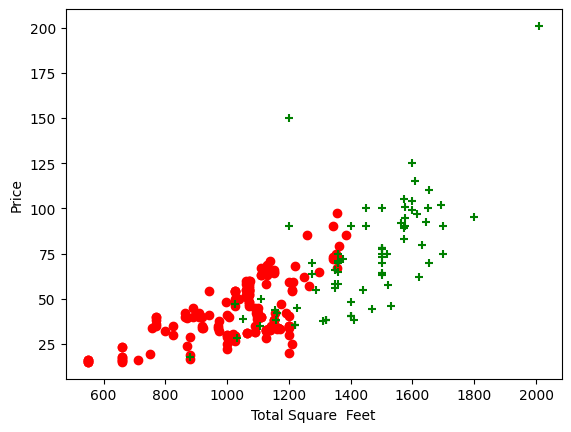

In [12]:
visualize('Electronic City', df2)

In [13]:
def remove_outliers(df):
    res = pd.DataFrame()
    for location, subdf in df.groupby('location'):
        bhk = dict()
        for size, subdf2 in subdf.groupby('size'):
            bhk[size] = np.mean(subdf2['price'])
        for size, subdf3 in subdf.groupby('size'):
            if size-1 in bhk:
                res = pd.concat((res, subdf3[subdf3.price > bhk[size-1]]), ignore_index=True)
            else:
                res = pd.concat((res, subdf3))
    return res        
        

In [14]:
df4 = remove_outliers(df3).copy()

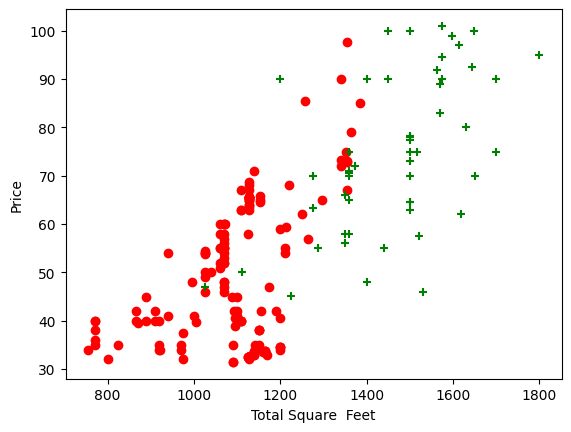

In [15]:
visualize('Electronic City', df4)

In [16]:
# removing rows if no of bathroom is 2 grater than  no of bed rooms
df4['size'] = df4['size'].apply(lambda x: int(x))
df5 = df4[df4['bath'] <= df4['size'] + 2]

In [17]:
df5.location = df5.location.apply(lambda x: x.strip())

C:\Users\JB_SACHIN\AppData\Local\Temp\ipykernel_18768\3767644928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(lambda x: x.strip())


In [18]:
dummies = pd.get_dummies(df5.location, dtype='int')
df5 = pd.concat((dummies, df5), axis=1)

In [19]:
df5.drop('location', axis=1, inplace=True)

In [20]:
df5

,1st Block Jayanagar,2nd Stage Nagarbhavi,3rd Block Hrbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,8th block Koramangala,9th Phase JP Nagar,AECS Layout,...,Yarandahalli,Yelahanka,Yelenahalli,Yeshwanthpur,others,size,total_sqft,bath,balcony,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1250.0,2.0,2.0,40.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1200.0,2.0,2.0,83.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1170.0,2.0,2.0,40.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,947.0,2.0,2.0,43.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1130.0,2.0,2.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,9,1200.0,9.0,3.0,230.0
9020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,11,1200.0,11.0,0.0,170.0
9021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,11,1200.0,6.0,3.0,150.0
9022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,13,5425.0,13.0,0.0,275.0


In [21]:
from sklearn.model_selection import train_test_split
X, y = df5.drop('price', axis=1), df5['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr_model =LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)
# len(X_train.columns)# cross_val_score(lr_model, X_test, y_test)

0.6027968574797187

In [26]:
np.where(X_train.columns == 'size')[0][0]

215

In [27]:
def predict_price(location, size, total_sqft, bath, balcony):
    x = np.zeros(len(X_train.columns))
    x[-1] = balcony
    x[-2] = bath
    x[-3] = total_sqft
    x[-4] = size
    loc_ind = np.where(X_train.columns == location)[0][0]
    x[loc_ind] = 1
    x = x.reshape(1, -1)
    
    return lr_model.predict(x)
    
    

In [28]:
np.where(X_train.columns == 'AECS ayout')

(array([], dtype=int64),)

In [29]:
X_train.columns

Index(['1st Block Jayanagar', '2nd Stage Nagarbhavi', '3rd Block Hrbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '8th block Koramangala', '9th Phase JP Nagar',
       'AECS Layout',
       ...
       'Whitefield', 'Yarandahalli', 'Yelahanka', 'Yelenahalli',
       'Yeshwanthpur', 'others', 'size', 'total_sqft', 'bath', 'balcony'],
      dtype='object', length=219)

In [30]:
import pickle
with open('bengaluru_house_pred_model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [31]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))